# Imports

In [156]:
%autosave 5
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("RdBu")
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('precision',6)
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
import plotly.figure_factory as ff

Autosaving every 5 seconds


# Load Data

In [237]:
# https://www.kaggle.com/ahsen1330/us-police-shootings
ois = pd.read_csv('C:/Users/kofil/OneDrive/Coding/Projects/Python/OIS/shootings.csv')

In [158]:
ois.head()

,id,name,date,cod,armed,age,gender,race,city,state,so_mi,threat_level,flee,body_camera,armscat
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


# Data Inspection

In [159]:
ois.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [160]:
ois.head()

,id,name,date,cod,armed,age,gender,race,city,state,so_mi,threat_level,flee,body_camera,armscat
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [161]:
ois.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4895 non-null   int64  
 1   name          4895 non-null   object 
 2   date          4895 non-null   object 
 3   cod           4895 non-null   object 
 4   armed         4895 non-null   object 
 5   age           4895 non-null   float64
 6   gender        4895 non-null   object 
 7   race          4895 non-null   object 
 8   city          4895 non-null   object 
 9   state         4895 non-null   object 
 10  so_mi         4895 non-null   bool   
 11  threat_level  4895 non-null   object 
 12  flee          4895 non-null   object 
 13  body_camera   4895 non-null   bool   
 14  armscat       4895 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(11)
memory usage: 506.8+ KB


In [162]:
## Gathering a random data sample to test integriy
## ois.sample(10)

# Data Cleaning

In [163]:
# Checking for nulls
ois.isnull()

,id,name,date,cod,armed,age,gender,race,city,state,so_mi,threat_level,flee,body_camera,armscat
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4891,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4892,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Null Percentage: Columns

In [164]:
(ois.isnull().sum() * 100 / len(ois)).value_counts(ascending=False)

0.0    15
dtype: int64

#### Null Count: Columns

In [165]:
ois.isnull().sum().value_counts(ascending=False)

0    15
dtype: int64

#### Null Percentage: Rows

In [166]:
(ois.isnull().sum(axis=1) * 100 / len(ois)).value_counts(ascending=False)

0.0    4895
dtype: int64

#### Null Count: Rows

In [167]:
ois.isnull().sum(axis=1).value_counts(ascending=False)

0    4895
dtype: int64

#### Checking for Duplicates

In [168]:
ois.duplicated().values.any()

False

In [169]:
# Dropping duplicates
ois.drop_duplicates(subset=None, inplace=True)

In [170]:
# Gathering a random data sample to test integriy
# ois.sample(10)

In [240]:
# Datatype Conversion
ois["date"] = pd.to_datetime(ois["date"])
ois["weekday"] = ois["date"].dt.weekday
ois['month'] = ois['date'].dt.month
ois['month_day'] = ois['date'].dt.day
ois['year'] = ois['date'].dt.year

# Exploratory Data Analysis

## Cause of Death Distribution

In [175]:
data = ois['cod'].value_counts().reset_index()
data.columns = ['cod', 'count']
fig = px.pie(
    data, 
    values='count', 
    names='cod', 
    title='Cause of Death', 
    width=800, 
    height=800,
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.show()

#### Getting shot was the overwhelming cause of death

## Weapon Used

In [186]:
data = ois['armed'].value_counts().reset_index()
data.columns = ['armed', 'count']
data = data.sort_values('count')
fig = px.bar(
    data.tail(25), 
    x='count', 
    y='armed', 
    orientation='h', 
    title='Weapon', 
    width=800, 
    height=800
)
fig.show()

#### Most popular weapons were guns and knives

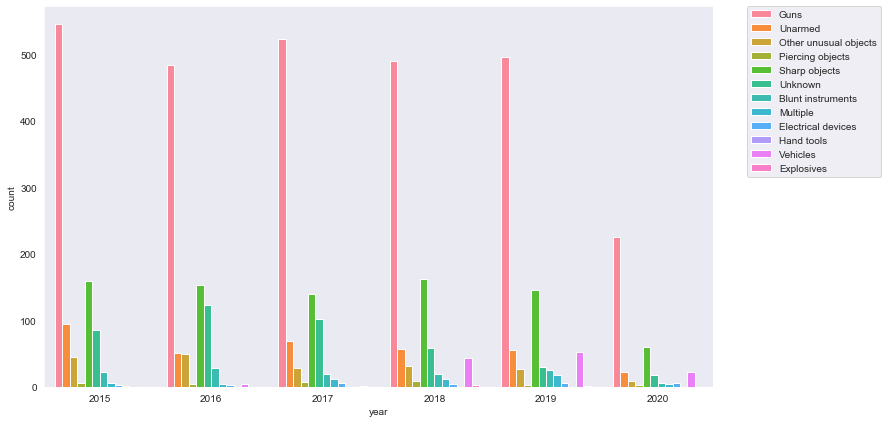

In [253]:
plt.figure(figsize=(12,7))
sns.countplot(x = ois['year'],data = ois,hue='armscat',saturation=2.0)
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

#### 2020 has lower overall values due to only having a partial years' dataset.

#### 2015-2019: Firearms were overhwelming used (as previously discovered), Piercing and Sharp Objects (combine both for ####knives?) make up the 2nd-most, especially if combined into one column.

#### Explosives being a cause of death noticablly increased from 2018 onwards

## Victim Demographics

### Age Distribution

In [243]:
fig = px.histogram(
    ois, 
    "age", 
    nbins=80, 
    title ='Age Distribution', 
    width=1000,
)
fig.show()

### Relative Frequency Distribution (KDE)

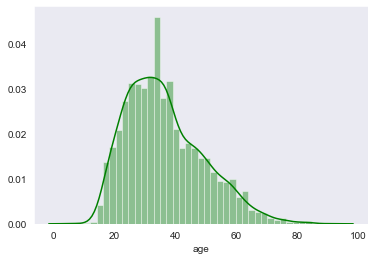

In [246]:
sns.distplot(ois['age'],kde=True,color='g')

### Age and Gender Box and Whisker

In [247]:
fig = px.box(ois, x='gender', y="age", title="Age Box and Whisker",color='gender')
fig.show()

### Age Violin Plot

In [248]:
fig = go.Figure(
    data=go.Violin(
        y=ois['age'], 
        x0='Age',
        fillcolor='gold'
    )
)
fig.show()

### Race and Age Box and Whisker

In [249]:
fig = px.box(ois, x='race', y="age", title="Race/Age Box and Whisker",color='race')
fig.show()

#### Large number of outliers for White, Hispanic and Black victims. Narrow Q2's for Black, Native, Other, and Hispanic victims. Even though the differences are only at minimum 3 years from the 2nd highest races' Q2 - Asian, 17 - the low(er) values for Other and Native can be reasonably explained by a small repersentation of those races within the overall dataset.

#### White victims had the overwhelming largest age range of their victims - 85 years.

#### Asian, Other, and Native victims had a significatnly lower age range --> I suspect this is due to the small repersentation within the dataset.

#### Outside of Asian and White victims, the median age of victims were essentially consistent between 30-33 years old.

In [251]:
data = ois['race'].value_counts().reset_index()
data.columns = ['race', 'count']
fig = px.pie(
    data, 
    values='count', 
    names='race',  
    title='Gender Distribution', 
    width=800, 
    height=500
)
fig.show()

#### Slight majority of White Victims. Black and Hispanic victims made up the next two highest populations impacted - with their combined portions making up 44.9%

In [179]:
data = ois['gender'].value_counts().reset_index()
data.columns = ['gender', 'count']
fig = px.pie(
    data, 
    values='count', 
    names='gender',  
    title='Gender Distribution', 
    width=800, 
    height=500
)
fig.show()

#### Overwhelming majority of victims are Male

### Death Counts by Race

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64


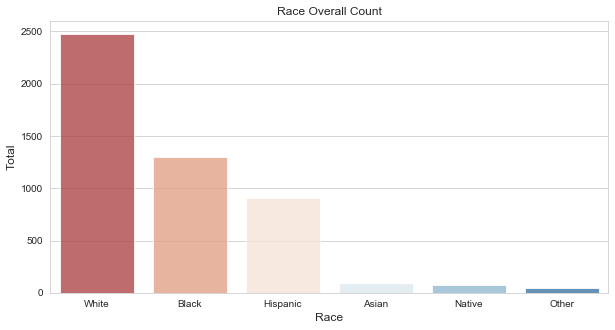

In [180]:
rcount  = ois['race'].value_counts()
rccount = rcount[:10,]
plt.figure(figsize=(10,5))
print(ois['race'].value_counts())
sns.barplot(rcount.index, rcount.values, alpha=0.8)
plt.title('Race Overall Count')
plt.ylabel('Total', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.show()

## Location-Based

### Top States in Terms of Shootings

In [187]:
df=ois['state'].value_counts().reset_index().rename(columns={'index':'state','state':'deaths'})

fig = go.Figure(go.Bar(
    x=df['state'],y=df['deaths'],
    marker={'color': df['deaths'], 
    'colorscale': 'Viridis'},  
))
fig.update_layout(title_text='Number of Deaths by State',xaxis_title="state",yaxis_title="count",height=500,width=1000)
fig.show()

#### Initially (TX, FL, AZ) there is a correlation between state population and death count. California has 75% more deaths despite only have an additional 5-7 Million population (~18-20%)

### Top Cities in Terms of Shootings

In [189]:
df=ois['city'].value_counts().reset_index().rename(columns={'index':'city','city':'deaths'})

fig = go.Figure(go.Bar(
    x=df['city'],y=df['deaths'],
    marker={'color': df['deaths'], 
    'colorscale': 'Viridis'},  
))
fig.update_layout(title_text='Number of Deaths by City',xaxis_title="city",yaxis_title="count",height=500,width=1000)
fig.show()

#### Within the first ~5-7 cities, there is a initial correlation between cities with a large population and the number of deaths in that city. Los Angeles, Houston, and Phoenix are 3 of the most populous cities in the country, and correpsondingly have the 3 highest counts. This trend isn't perfect throughout the list, but it holds true in the aggregate.

### Top 10 US Cities Involved in Police Shootings

In [197]:
df=ois['city'].value_counts().reset_index().rename(columns={'index':'city','city':'deaths'}).head(10)
fig = go.Figure(go.Bar(x=df['city'], y=df['deaths'],
                       marker={'color': df['deaths'], 'colorscale': 'Viridis'},
                       text=df['deaths'],textposition = "outside"))

fig.update_layout(title_text='Top 10 Cities involved  in Police Shooting in the US',xaxis_title="Cities",yaxis_title="Number of Shootings")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

## Deaths by Date/Weekday/etc.

### Number of Incidents by Weekday

In [241]:
# 0 index = Monday, 1 = Tuesday, 2 = Wednesday, ... 
# Nuke Colors?



data = ois.groupby(['weekday'])['name'].count().reset_index()
data.columns = ['weekday', 'count']
fig = px.bar(
    data, 
    x='weekday', 
    y='count',
    orientation='v', 
    title='Number of Incidents by Weekday', 
    width=1000,
)
fig.show()

#### No one day stands out over any other in terms of death count. Pretty even distriubtion.

### Number of Incidents by Month

In [218]:
data = ois.groupby(['month'])['name'].count().reset_index()
data.columns = ['month', 'count']
data['month'] = data['month'].astype(str)
data = data.head(65)
fig = px.line(
    data, 
    x="month", 
    y="count", 
    title='Total Deaths Trend by Month'
)
fig.show()

#### Negative trend as time goes on, with Janurary-March being the peak months. This is interesting, as I expected the North American summer months to lead the dataset in terms of death count.

### Number of Incidents by Day of Month

In [220]:
data = ois.groupby(['month_day'])['name'].count().reset_index()
data.columns = ['month_day', 'count']
data['month_day'] = data['month_day'].astype(str)
data = data.head(65)
fig = px.line(
    data, 
    x="month_day", 
    y="count", 
    title='Total Deaths Trend by Day of Month'
)
fig.show()

#### Relatively even distribution. Peaks at Days 1,5, and 27. Drastic drop-off beginning at day 29.

### Number of Incidents by Year

In [221]:
data = ois.groupby(['year'])['name'].count().reset_index()
data.columns = ['year', 'count']
data['year'] = data['year'].astype(str)
data = data.head(65)
fig = px.line(
    data, 
    x="year", 
    y="count", 
    title='Total Deaths Trend by Day of Month'
)
fig.show()

#### 2020 is a clear outlier here due to not having a full years worth of data

In [213]:
ois['month_year'] = pd.to_datetime(ois['date']).dt.to_period('M')

In [224]:
data = ois.groupby(['month_year'])['name'].count().reset_index()
data.columns = ['month_year', 'count']
data['month_year'] = data['month_year'].astype(str)
data = data.head(65)
fig = px.line(
    data, 
    x="month_year", 
    y="count", 
    title='Total Deaths Trend by Day of Month'
)
fig.show()

#### Severe dropff at the end of 2017. Natural decrease? Data Error? Decrease was significant --> Nearly a 50% reduction from 
#### the previous observation. 

#### Other noticable drops: Q1 2015, Q2/Q3 2018, Q4 2019, Jan 2020

## Flee Distribution

In [226]:
data = ois.groupby(['flee'])['name'].count().reset_index()
data.columns = ['flee', 'count']
fig = px.bar(
    data, 
    x='flee', 
    y='count', 
    orientation='v', 
    title='Flee Distribution', 
    width=1000
)
fig.show()

#### Victims overwhelmingly chose not to flee/were not fleeing at their time of death

## Body Camera Usage Based Upon Threat Level

[Text(0, 0.5, 'Shooting Count'), Text(0.5, 0, 'Threat Level')]

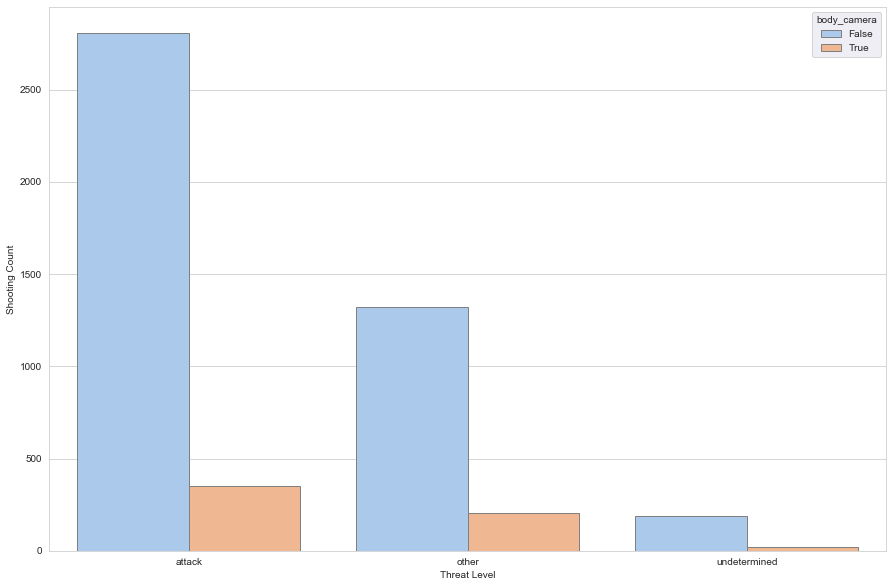

In [229]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set_style("dark")
sns.countplot(x="threat_level", hue="body_camera",palette="pastel", edgecolor="0.5", data=ois);
ax.set(xlabel='Threat Level',ylabel='Shooting Count')

#### Regardless of threat level, body cameras were not used the majority of the time.